<a href="https://colab.research.google.com/github/sooeun67/DeepLearning/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

In [0]:
mnist_builder = tfds.builder("mnist")
mnist_builder.download_and_prepare()
datasets = mnist_builder.as_dataset()
ds_train, ds_test = datasets['train'], datasets['test']

train_images = [data['image'].numpy().reshape(-1) / 255 for data in ds_train]    #reshape(-1) = flatten          이거 안하고, keras에서 layers.Flatten 써도 됨
train_labels = [data['label'] for data in ds_train]
test_images = [data['image'].numpy().reshape(-1) / 255 for data in ds_test]
test_labels = [data['label'] for data in ds_test]


In [0]:
train_images = np.array(train_images)
test_images = np.array(test_images)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Multi-Layer Perceptron

model = Sequential()

model.add(Dense(input_shape=(784,), units=32, activation='relu'))
model.add(Dense(units=784, activation='sigmoid'))    #softmax는 결과값이 확률일 때 사용하는데, mnist 이미지 재현이 목적이기 때문에 softmax는 부적절. 
model.summary()

model.compile(loss='binary_crossentropy', 
              optimizer='adam')

model.fit(train_images, train_images, epochs=50, batch_size=256)    # autoencoder의 가장 큰 차이점은: X 와 X가 대칭으로 들어간다는 것. 왜냐하면 X의 재현이 autoencoder의 목적이니까

235/235 [==============================] - 2s 9ms/step - loss: 0.0928
Epoch 37/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0928
Epoch 38/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0927
Epoch 39/50
 37/235 [===>..........................] - ETA: 1s - loss: 0.0927

KeyboardInterrupt: ignored

In [0]:
class Image:
    def __init__(self, matrix):
        self.matrix = matrix.astype('uint8')
    def show(self):
        plt.figure(figsize=(30,30))
        plt.imshow(self.matrix)

def show_images(images, shape, figsize=(30, 30), **kwargs):
    fig=plt.figure(figsize=figsize)
    rows, columns = shape
    for image_index, image in enumerate(images):
        ax = fig.add_subplot(rows, columns, image_index + 1)
        if 'titles' in kwargs and kwargs['titles'] is not None:
            ax.set_title(kwargs['titles'][image_index], fontproperties=fontprop)
        plt.imshow(image.matrix)
    plt.show()

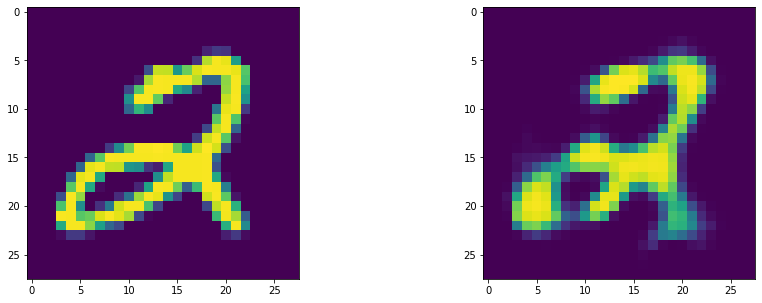

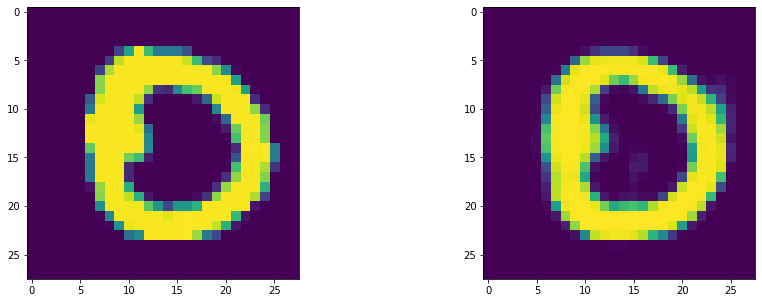

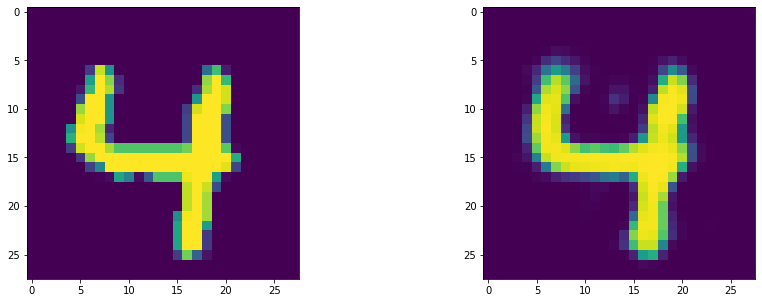

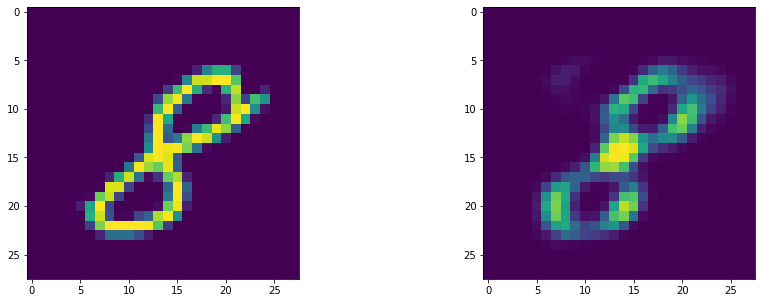

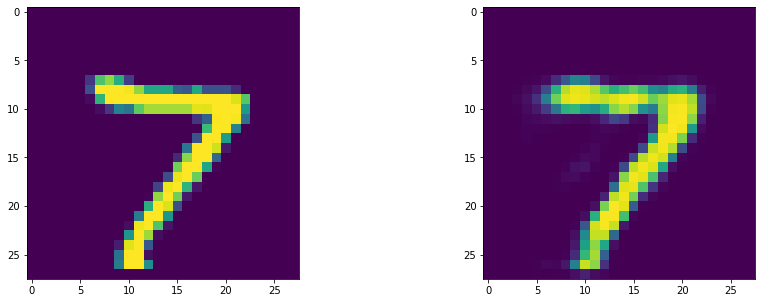

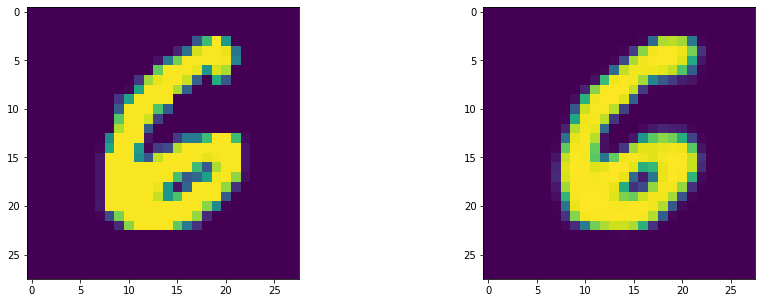

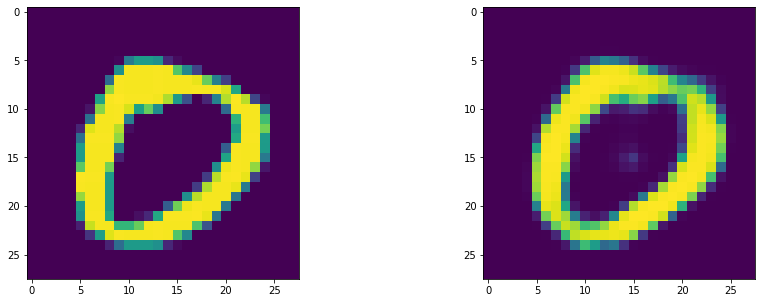

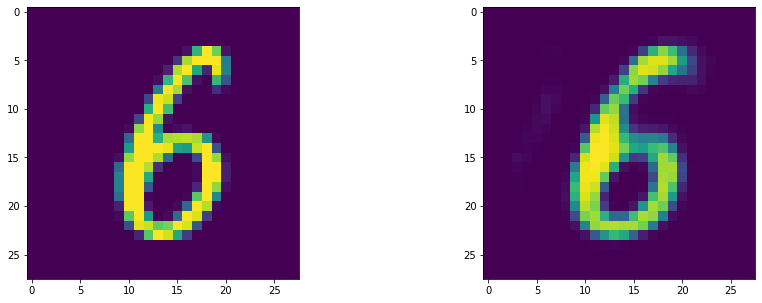

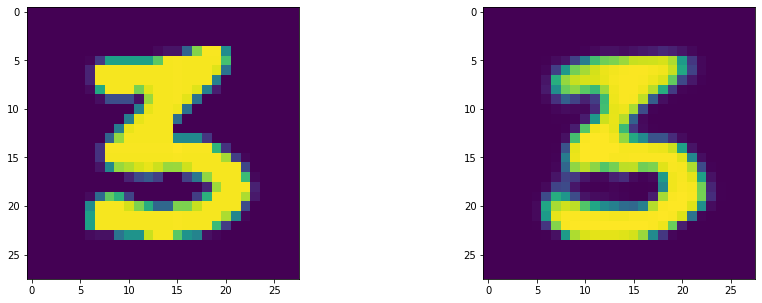

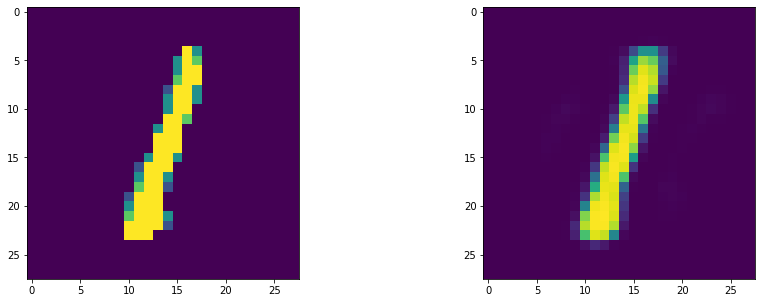

In [0]:
import matplotlib.pyplot as plt

images = test_images[:10]
images_r = model.predict(images)

for image, image_r in zip(images.reshape(10, 28, 28), images_r.reshape(10, 28, 28)):
  show_images([Image(image * 255), Image(image_r * 255)], (1, 2), figsize=(15, 5))

In [0]:
train_images = [data['image'].numpy() for data in ds_train]    
test_images = [data['image'].numpy() for data in ds_test]

train_images = np.array(train_images) / 255
test_images = np.array(test_images) / 255

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Reshape

# model = Sequential()
# model.add(Conv2D(4, 7, input_shape=(32, 32, 3)))
# model.add(MaxPool2D())
# model.add(Conv2D(8, 4))
# model.add(MaxPool2D())
# model.add(Conv2D(16, 2))
# model.add(Flatten())



#CNN  
model = Sequential()

model.add(Conv2D(8, 8, input_shape=(28, 28, 1)))     # input shape인 784를 3차원으로 주어야한다 -> 2D CNN 은 3D input을 받는다
model.add(MaxPool2D())      #max pooling은 layer마다 넣어주기
model.add(Conv2D(4, 5))     # encoding 압축되는 hidden layer 
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(units=784, activation='sigmoid'))  # decoder는 다시 784로 받는다
model.add(Reshape((28, 28, 1)))  # decoder는 다시 784로 받는다
model.summary()


model.compile(loss='binary_crossentropy', 
              optimizer='adam')

model.fit(train_images, train_images, epochs=50, batch_size=256)    # autoencoder의 가장 큰 차이점은: X 와 X가 대칭으로 들어간다는 것. 왜냐하면 X의 재현이 autoencoder의 목적이니까

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 21, 21, 8)         520       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 10, 10, 8)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 6, 6, 4)           804       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 3, 3, 4)           0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 36)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 784)               29008     
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)       

KeyboardInterrupt: ignored

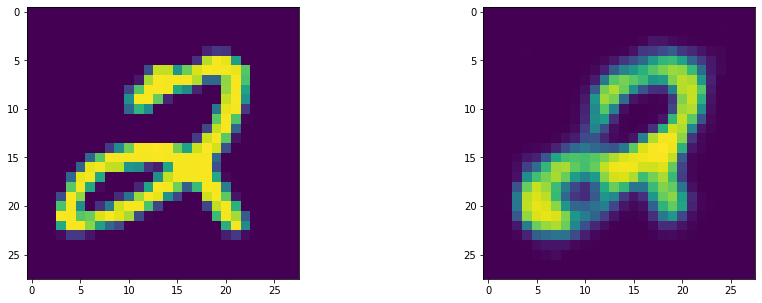

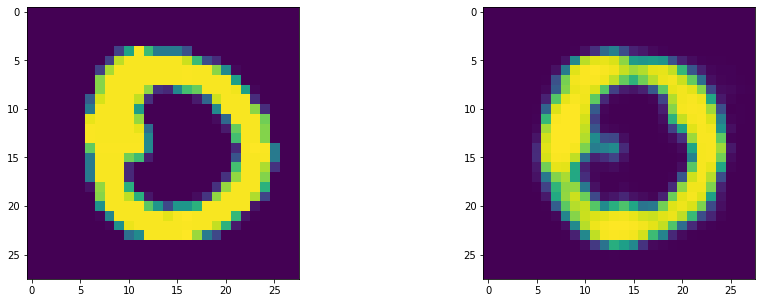

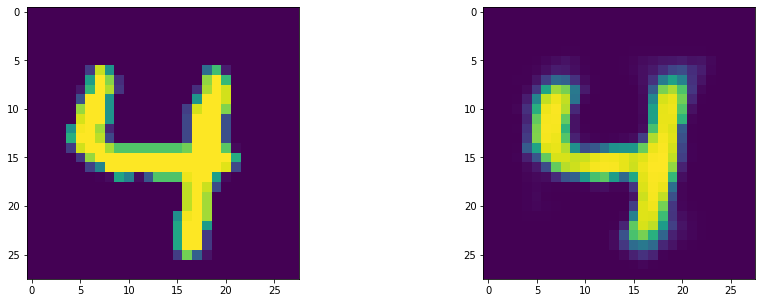

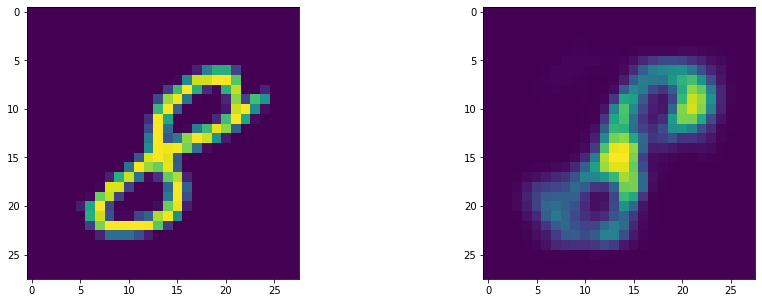

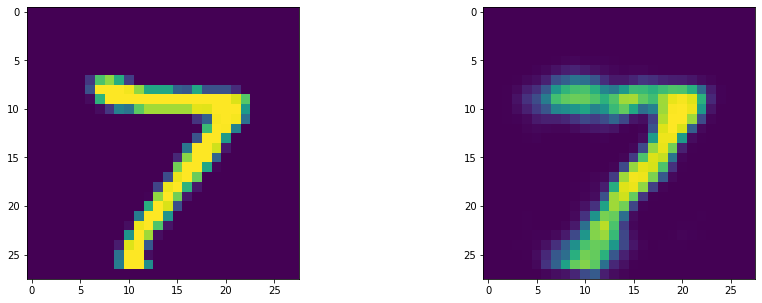

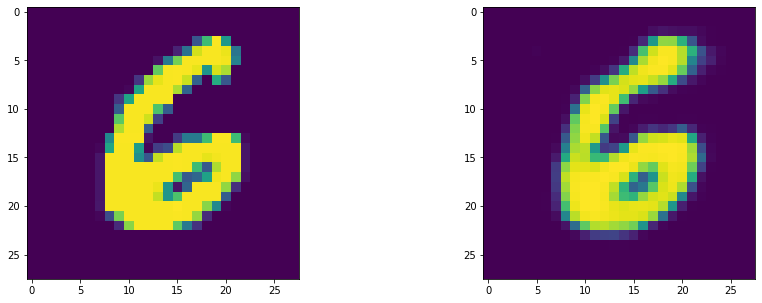

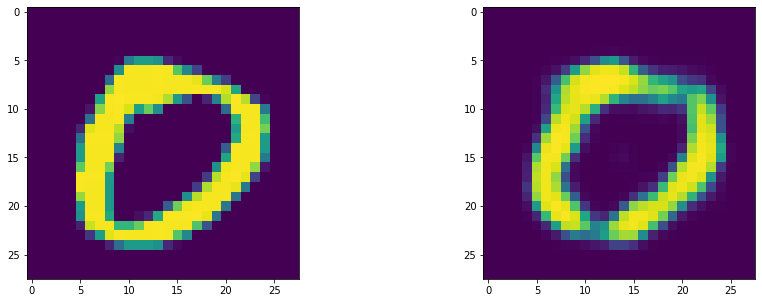

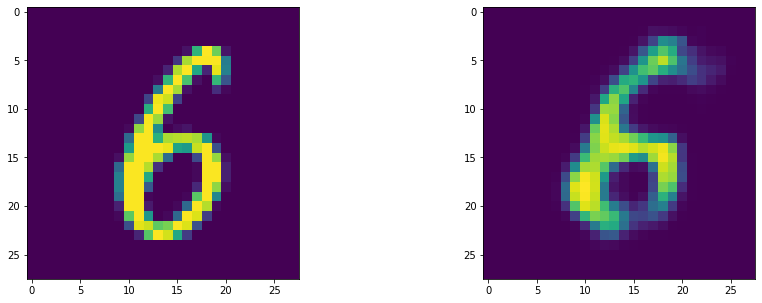

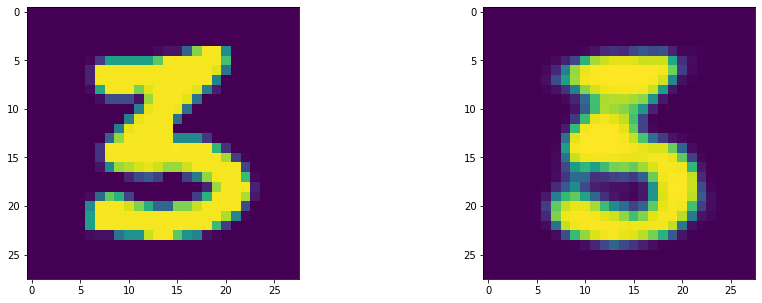

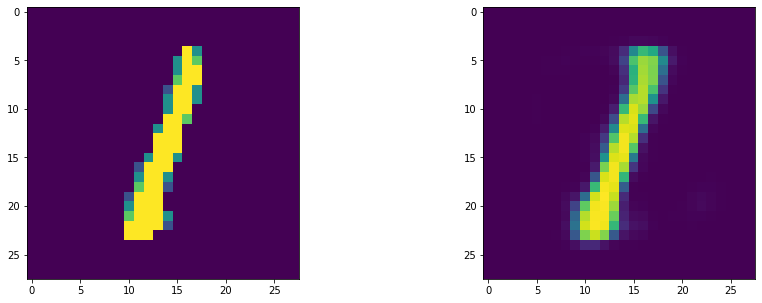

In [0]:
import matplotlib.pyplot as plt

images = test_images[:10]
images_r = model.predict(images)

for image, image_r in zip(images.reshape(10, 28, 28), images_r.reshape(10, 28, 28)):
  show_images([Image(image * 255), Image(image_r * 255)], (1, 2), figsize=(15, 5))

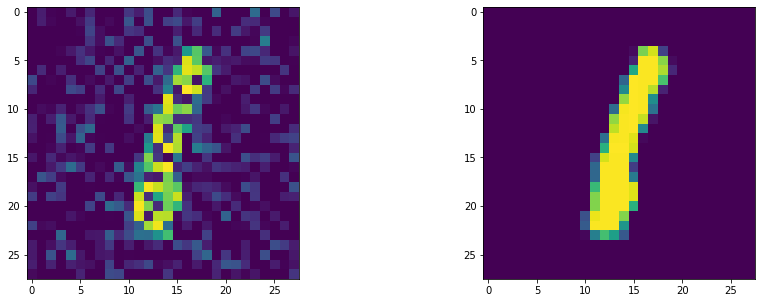

In [0]:
noised_images = np.maximum(0, train_images + np.random.normal(0, 0.15, size=train_images.shape))

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Reshape

# model = Sequential()
# model.add(Conv2D(4, 7, input_shape=(32, 32, 3)))
# model.add(MaxPool2D())
# model.add(Conv2D(8, 4))
# model.add(MaxPool2D())
# model.add(Conv2D(16, 2))
# model.add(Flatten())



#CNN  
model = Sequential()

model.add(Conv2D(8, 8, input_shape=(28, 28, 1)))     # input shape인 784를 3차원으로 주어야한다 -> 2D CNN 은 3D input을 받는다
model.add(MaxPool2D())      #max pooling은 layer마다 넣어주기
model.add(Conv2D(4, 5))     # encoding 압축되는 hidden layer 
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(units=784, activation='sigmoid'))  # decoder는 다시 784로 받는다
model.add(Reshape((28, 28, 1)))  # decoder는 다시 784로 받는다
model.summary()


model.compile(loss='binary_crossentropy', 
              optimizer='adam')

model.fit(noised_images, train_images, epochs=10, batch_size=256)    # autoencoder의 가장 큰 차이점은: X 와 X가 대칭으로 들어간다는 것. 왜냐하면 X의 재현이 autoencoder의 목적이니까

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 21, 21, 8)         520       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 10, 10, 8)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 6, 6, 4)           804       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 3, 3, 4)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 36)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 784)               29008     
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28, 1)       

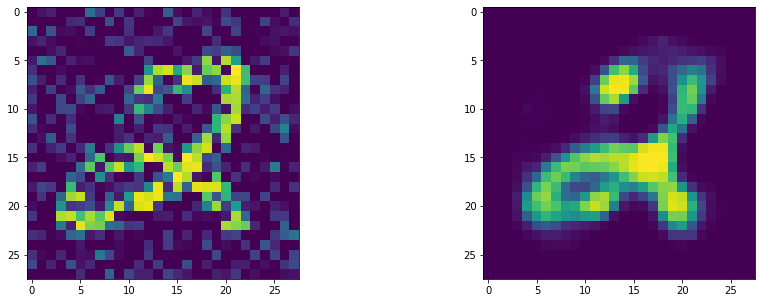

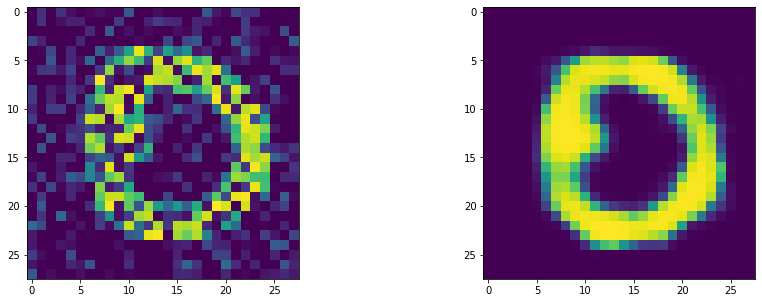

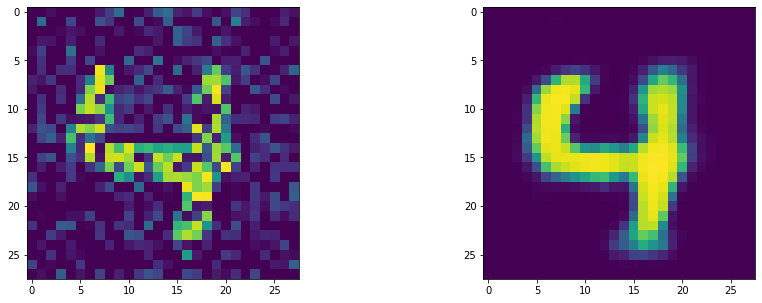

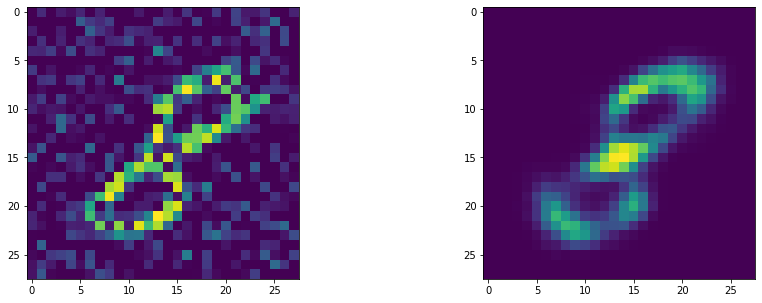

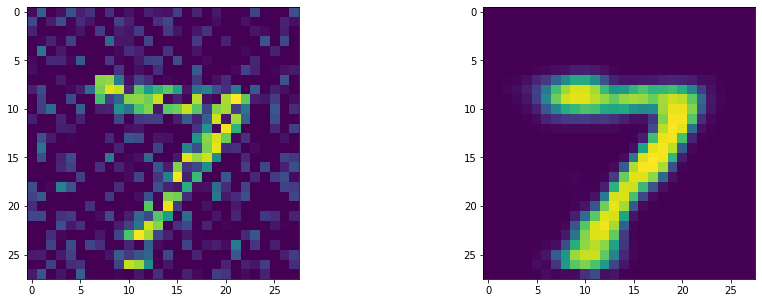

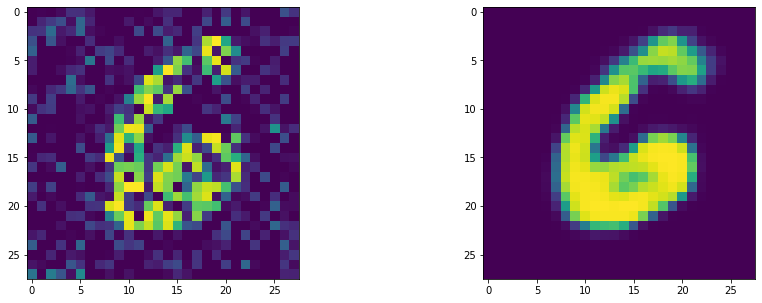

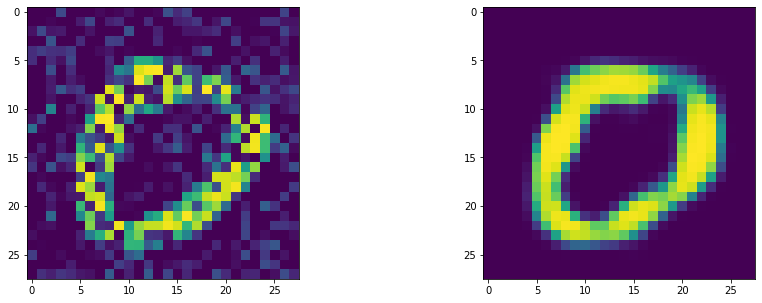

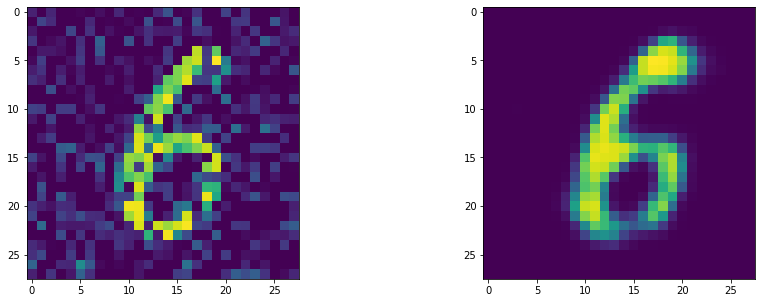

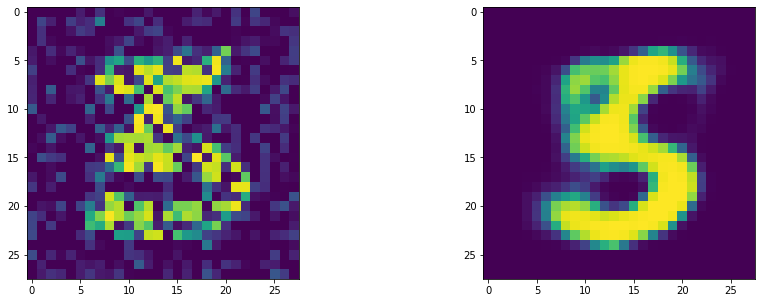

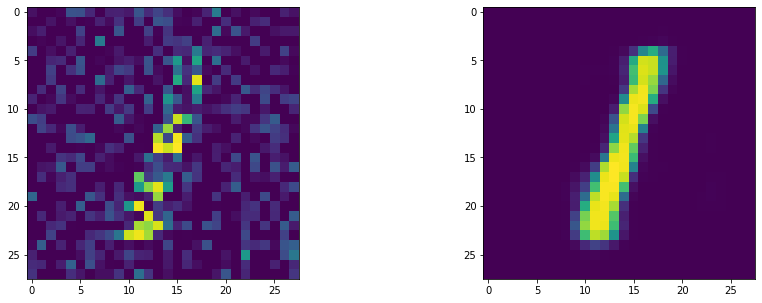

In [0]:
import matplotlib.pyplot as plt

noised_test_images = np.maximum(0, test_images + np.random.normal(0, 0.15, size=test_images.shape))

images = noised_test_images[:10]
images_r = model.predict(images)

for image, image_r in zip(images.reshape(10, 28, 28), images_r.reshape(10, 28, 28)):
  show_images([Image(image * 255), Image(image_r * 255)], (1, 2), figsize=(15, 5))